# Projet Speed Dating (Tinder)

Analyses relatives aux participants:
- qui sont-ils
- que cherchent-ils
- comment se voient-ils
- ...

## Import de modules externes

In [54]:
import pandas as pd
# import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio

from data_loader import load_and_prepare_dataset

from speed_dating_document_context import (
    participant_cols,
    LabelDecoder,
)

from viz import plot_attribute_expectations_per_genre

from config import (
    COLORS,
)

# display settings
pd.set_option('display.max_columns', None)    # Show all columns
pd.set_option('display.width', 1000)          # Expand display width
pd.set_option('display.max_colwidth', None)   # Show full content in each cell


# issue with plotly incresing notebook size
pio.renderers.default = "notebook_connected"

In [55]:
speed_dating_df = load_and_prepare_dataset()

print("Dataset shape: ", speed_dating_df.shape)

Dataset shape:  (8368, 201)


## EDA

### Découverte des participants
Comment se repartissent les participants, quelles sont leurs attentes.

#### Préparation du dataset synthétique des participants

In [56]:
# Informations personnelles et attentes des participants
participant_df = speed_dating_df[participant_cols].drop_duplicates().reset_index(drop=True)

# Build a dataframe with one line per participant.
# Some aggregation will be made for:
# - matches: sum
# - decisions (by the participant and the partner): sum
# - notes attributes by the partner after the dating: mean of all given scores
match_stats_df = speed_dating_df[participant_cols + ["match", "dec", "dec_o", "attr_o", "sinc_o", "intel_o", "fun_o", "amb_o", "shar_o"]].groupby("iid").agg(
    {"match": "sum", "dec": "sum", "dec_o": "sum", "attr_o": "mean", "sinc_o": "mean", "intel_o": "mean", "fun_o": "mean", "amb_o": "mean", "shar_o": "mean"})

match_stats_df = match_stats_df.rename(columns={
    "match": "match_count",
    "dec": "dec_count",
    "dec_o": "dec_o_count",
})

participant_df = participant_df.merge(match_stats_df, how='left', on='iid')

print("Registered participants: ", len(participant_df["iid"].unique()))
print("Unique participant ids: ", len(speed_dating_df["iid"].unique()))
print("Both numbers should be equal...")

Registered participants:  551
Unique participant ids:  551
Both numbers should be equal...


In [57]:
participant_df

,iid,age,gender,gender_label,race,race_label,goal,goal_label,field,field_cd,field_cd_label,undergra,mn_sat,tuition,imprace,imprelig,from,zipcode,income,date,go_out,career,career_c,career_c_label,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,intel3_1,fun3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,match_count,dec_count,dec_o_count,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o
0,1,21.0,0,Woman,4,Asian/Pacific Islander/Asian-American,2,To meet new people,Law,1,Law,NaN,NaN,NaN,2.0,4.0,Chicago,"60,521","69,487.00",7,1,lawyer,15,Other,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,4,8,5,6.700000,7.400000,8.000000,7.200000,8.000000,7.100000
1,2,24.0,0,Woman,2,European/Caucasian-American,1,Seemed like a fun night out,law,1,Law,NaN,NaN,NaN,2.0,5.0,Alabama,"35,223","65,929.00",5,1,law,15,Other,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0,4.0,5.0,45.0,5.0,25.0,20.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,65.0,0.0,10.0,25.0,0.0,0.0,7.0,5.0,8.0,10.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6.0,8.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,18.92,18.92,21.62,27.03,5.41,8.11,30.0,5.0,40.0,15.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,2,4,6,7.700000,7.100000,7.900000,7.500000,7.500000,6.500000
2,3,25.0,0,Woman,2,European/Caucasian-American,6,Other,Economics,2,Math,NaN,NaN,NaN,8.0,4.0,Connecticut,"6,268",NaN,3,1,Economist,15,Other,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,5.0,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0,4.0,2.0,35.0,10.0,35.0,10.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,0.0,20.0,30.0,0.0,0.0,8.0,9.0,9.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,5,6.500000,7.100000,7.300000,6.200000,7.111111,6.000000
3,4,23.0,0,Woman,2,European/Caucasian-American,1,Seemed like a fun night out,Law,1,Law,NaN,NaN,NaN,1.0,1.0,Texas,"77,096","37,754.00",5,1,lawyer/policy work,1,Lawyer,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0,1.0,2.0,20.0,20.0,20.0,20.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,30.0,10.0,15.0,30.0,5.0,10.0,7.0,8.0,7.0,9.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,8.0,7.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,24.14,13.79,20.69,27.59,10.34,3.45,20.0,20.0,20.0,20.0,0.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,2,3,6,7.000000,7.100000,7.700000,7.500000,7.700000,7.200000
4,5,21.0,0,Woman,2,European/Caucasian-American,2,To meet new people,Law,1,Law,NaN,NaN,NaN,8.0,1.0,Bowdoin College,"94,022","86,340.00",4,1,lawyer,1,Lawyer,7.0,4.0,7.0,7.0,6.0,8.0,6.0,6.0,8.0,6.0,8.0,6.0,6.0,3.0,7.0,8.0,3.0,7.0,10.0,20.0,5.0,25.0,25.0,10.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,10.0,10.0,20.0,5.0,5.0,6.0,3.0,10.0,6.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.0,9.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,15.79,13.16,18.42,15.79,15.79,21.05,30.0,10.0,20.0,20.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,2,6,3,5.300000,7.700000,7.600000,7.200000,7.800000,6.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [58]:
# Final gender balance

gender_df = speed_dating_df.drop_duplicates("iid")["gender"].map({0:'Woman',1:'Man'}).reset_index()
gender_df.groupby("gender").count()

,index
gender,
Man,277
Woman,274


Text(0.5, 0, 'Genre')

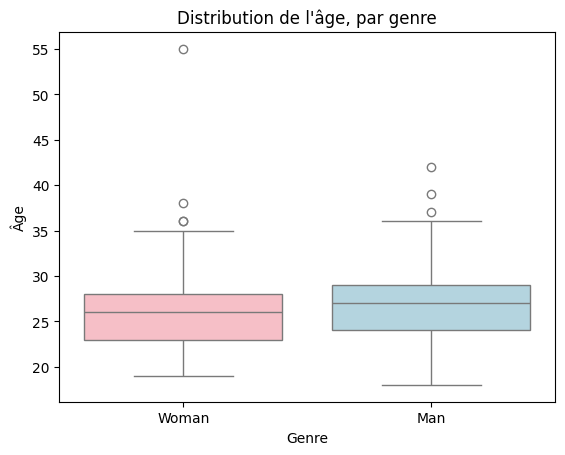

In [59]:
# #E7A77D

palette_gender = {
  0: COLORS["woman"],
  1: COLORS["man"]
}

palette_gender_label = {
  "Woman": COLORS["woman"],
  "Man": COLORS["man"]
}

box = sns.boxplot(participant_df, x='gender_label', y='age',  hue="gender" , palette=palette_gender, legend=False)
box.set_title("Distribution de l'âge, par genre")
box.set_ylabel("Âge")
box.set_xlabel("Genre")


In [60]:
print('Age Descriptive Statistics')
participant_df['age'].describe().round()

Age Descriptive Statistics


count    543.0
mean      26.0
std        4.0
min       18.0
25%       24.0
50%       26.0
75%       28.0
max       55.0
Name: age, dtype: float64

Text(0.5, 0, 'Âge')

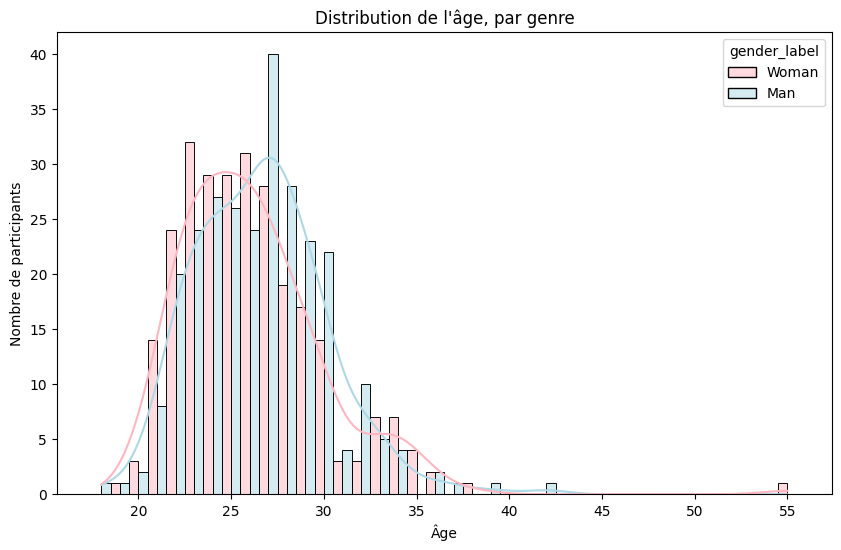

In [61]:
# Default
# sns.set()

fig, ax = plt.subplots(figsize=(10, 6))

hplot = sns.histplot(ax=ax, data=participant_df,
                     x="age", hue="gender_label",
                     discrete=True, multiple="dodge", kde=True,
                     palette=palette_gender_label)

hplot.set_title("Distribution de l'âge, par genre")
hplot.set_ylabel("Nombre de participants")
hplot.set_xlabel("Âge")


Les participants ont majoritairement entre 20 et 30 ans.

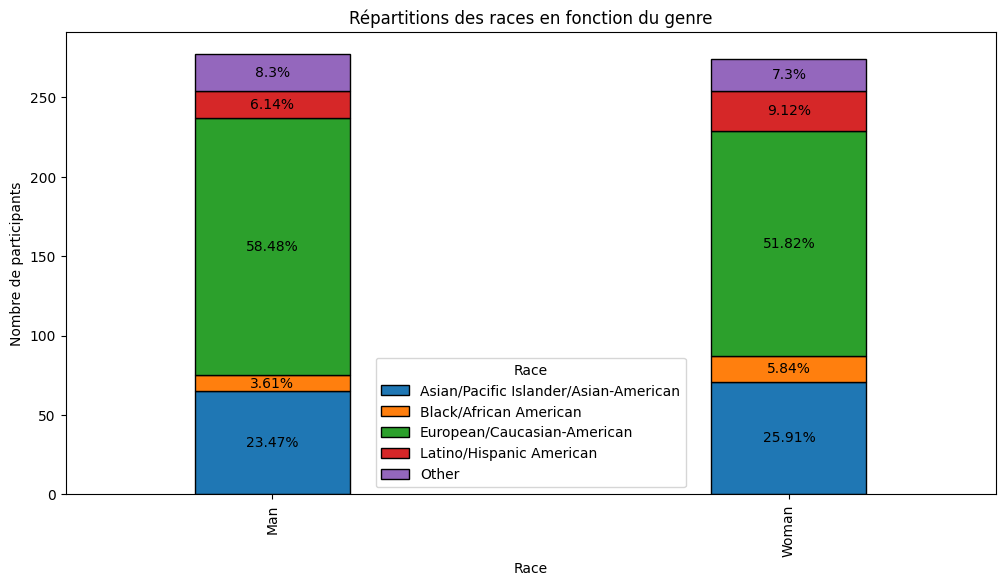

In [62]:
# Répartitions des races en fonction du genre

races_df = participant_df.pivot_table(index='gender_label', columns='race_label', values='iid', aggfunc='count', margins=True, margins_name="Total")
races_histo_df = races_df.iloc[:-1, :-1]

# Computing labels
labels_df = pd.DataFrame()

for c in races_df.columns[:-1]:
    labels_df[c] = round((100 * races_df[c] / races_df["Total"]), 2)
    labels_df[c] = labels_df[c].astype(str) + "%"

fig, ax = plt.subplots(figsize = (12, 6))

bplot = races_histo_df.plot.bar(stacked = True,
                  ax = ax,
                  width = 0.3,
                  edgecolor = "black")

bplot.set_title("Répartitions des races en fonction du genre")
bplot.set_xlabel("Race")
bplot.set_ylabel("Nombre de participants")

bplot.get_legend().set_title("Race")

# Add labels
for i, c in enumerate(ax.containers):
    labels = labels_df.iloc[:-1, i].tolist()

    ax.bar_label(c,label_type='center',labels=labels)
    # ax.yaxis.set_major_formatter(mtick.PercentFormatter())  




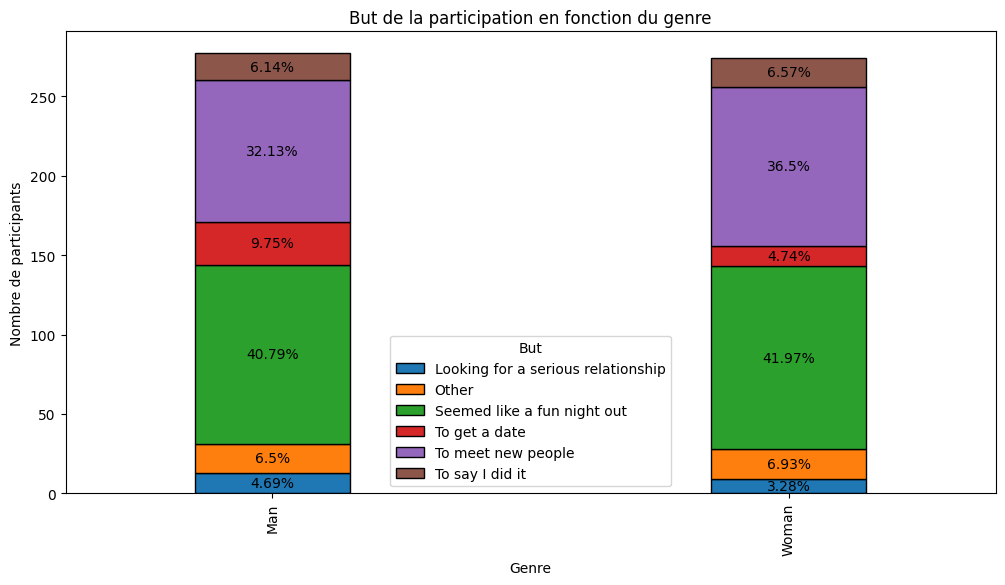

In [63]:
# But de la participation en fonction du genre

goal_df = participant_df.pivot_table(index='gender_label', columns='goal_label', values='iid', aggfunc='count', margins=True, margins_name="Total")
goal_histo_df = goal_df.iloc[:-1, :-1]

# Computing labels
labels_df = pd.DataFrame()

for c in goal_df.columns[:-1]:
    labels_df[c] = round((100 * goal_df[c] / goal_df["Total"]), 2)
    labels_df[c] = labels_df[c].astype(str) + "%"

fig, ax = plt.subplots(figsize = (12, 6))

bplot = goal_histo_df.plot.bar(stacked = True,
                  ax = ax,
                  width = 0.3,
                  edgecolor = "black")

bplot.set_title("But de la participation en fonction du genre")
bplot.set_xlabel("Genre")
bplot.set_ylabel("Nombre de participants")

bplot.get_legend().set_title("But")

# Add labels
for i, c in enumerate(ax.containers):
    labels = labels_df.iloc[:-1, i].tolist()

    ax.bar_label(c,label_type='center',labels=labels)

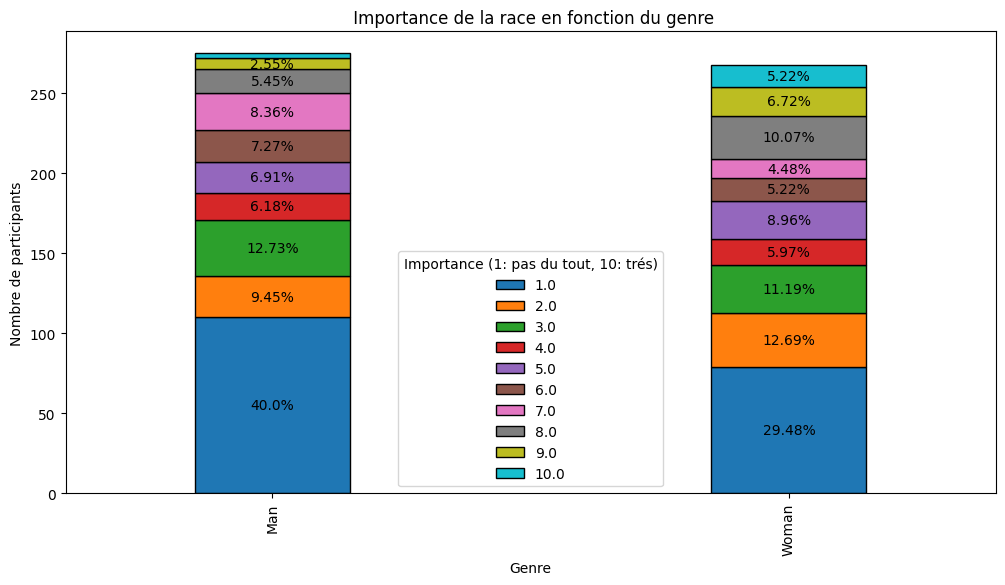

In [64]:
# Importance de la race en fonction du genre, parmi les opinions exprimées
imprace_df = participant_df[participant_df["imprace"] is not None and participant_df["imprace"] > 0].pivot_table(index='gender_label', columns='imprace', values='iid', aggfunc='count', margins=True, margins_name="Total")
imprace_histo_df = imprace_df.iloc[:-1, :-1]

# Computing labels
labels_df = pd.DataFrame()

for c in imprace_df.columns[:-1]:
    labels_df[c] = round((100 * imprace_df[c] / imprace_df["Total"]), 2)
    labels_df[c] = labels_df[c].map(lambda x: "" if x is None or x < 2.0 else str(x) + "%") #.astype(str) + "%"
    

fig, ax = plt.subplots(figsize = (12, 6))

bplot = imprace_histo_df.plot.bar(stacked = True,
                  ax = ax,
                  width = 0.3,
                  edgecolor = "black")

bplot.set_title(" Importance de la race en fonction du genre")
bplot.set_xlabel("Genre")
bplot.set_ylabel("Nombre de participants")

bplot.get_legend().set_title("Importance (1: pas du tout, 10: trés)")

# Add labels
for i, c in enumerate(ax.containers):
    labels = labels_df.iloc[:-1, i].tolist()

    ax.bar_label(c,label_type='center',labels=labels)

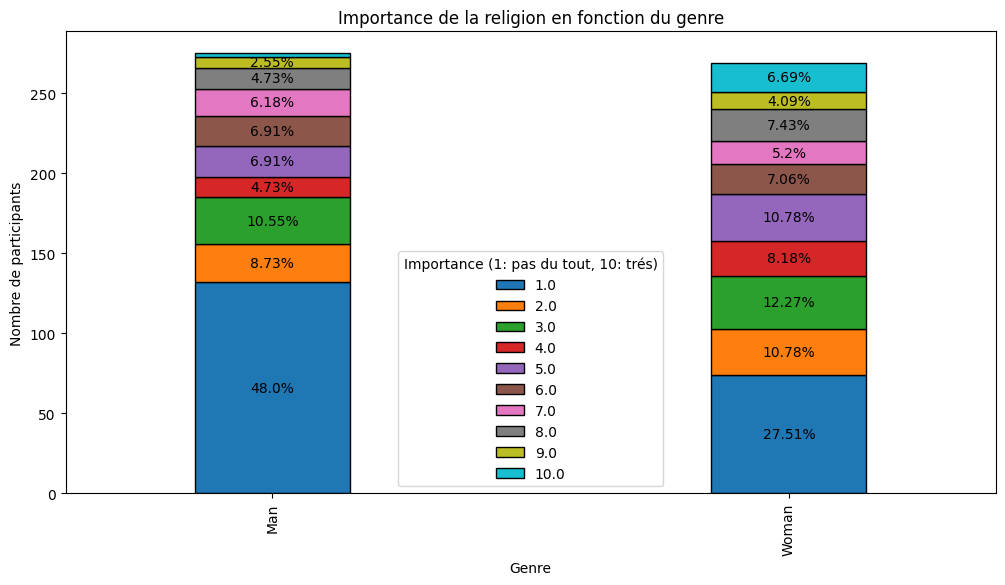

In [65]:
# Importance de la religion en fonction du genre, parmi les opinions exprimées
imprelig_df = participant_df[participant_df["imprelig"] is not None and participant_df["imprelig"] > 0].pivot_table(index='gender_label', columns='imprelig', values='iid', aggfunc='count', margins=True, margins_name="Total")
imprelig_histo_df = imprelig_df.iloc[:-1, :-1]

# Computing labels
labels_df = pd.DataFrame()

for c in imprelig_df.columns[:-1]:
    labels_df[c] = round((100 * imprelig_df[c] / imprelig_df["Total"]), 2)
    labels_df[c] = labels_df[c].map(lambda x: "" if x is None or x < 2.0 else str(x) + "%") #.astype(str) + "%"
    

fig, ax = plt.subplots(figsize = (12, 6))

# sns.set(style="darkgrid")

bplot = imprelig_histo_df.plot.bar(stacked = True,
                  ax = ax,
                  width = 0.3,
                  edgecolor = "black")

bplot.set_title("Importance de la religion en fonction du genre")
bplot.set_xlabel("Genre")
bplot.set_ylabel("Nombre de participants")

bplot.get_legend().set_title("Importance (1: pas du tout, 10: trés)")

# Add labels
for i, c in enumerate(ax.containers):
    labels = labels_df.iloc[:-1, i].tolist()

    ax.bar_label(c,label_type='center',labels=labels)

#### De l'importance des critères

##### Importance présumée

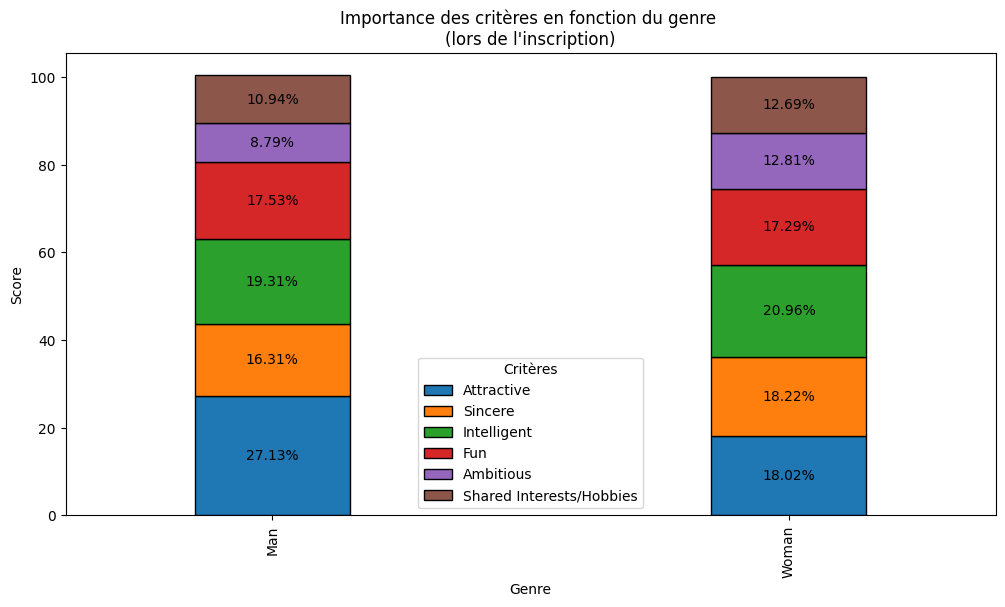

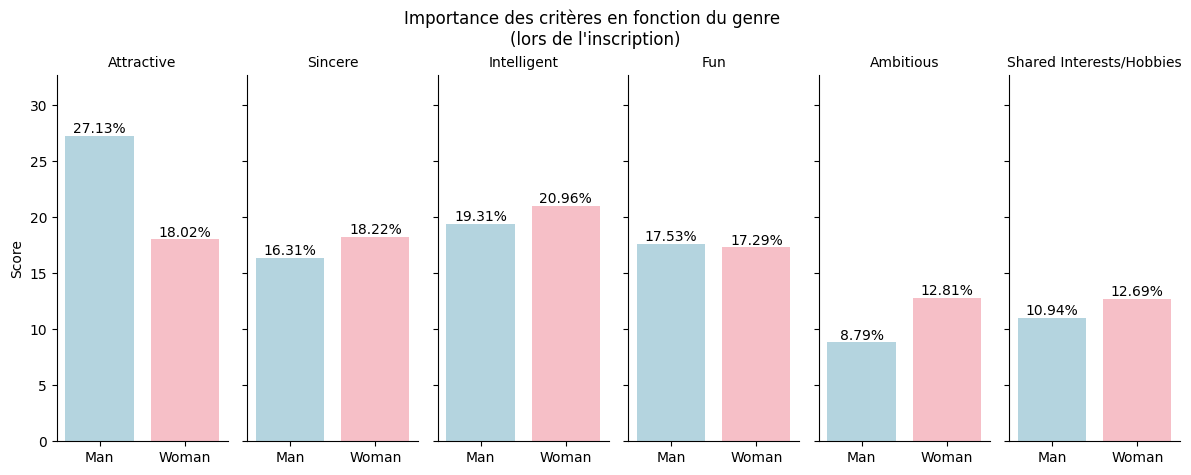

In [66]:
plot_attribute_expectations_per_genre(participant_df, ["attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1"], "Importance des critères en fonction du genre \n(lors de l'inscription)", palette_gender_label)

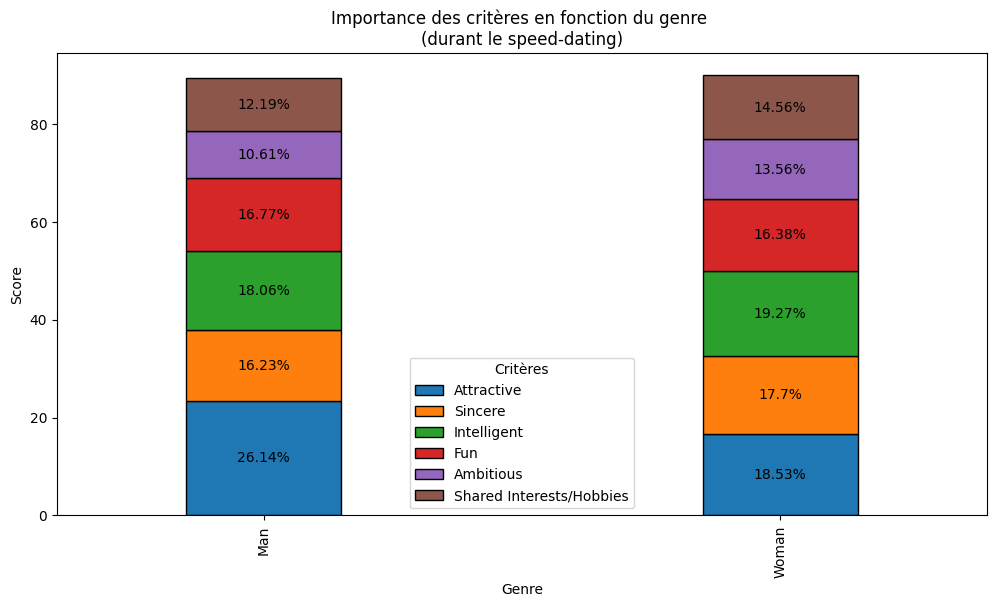

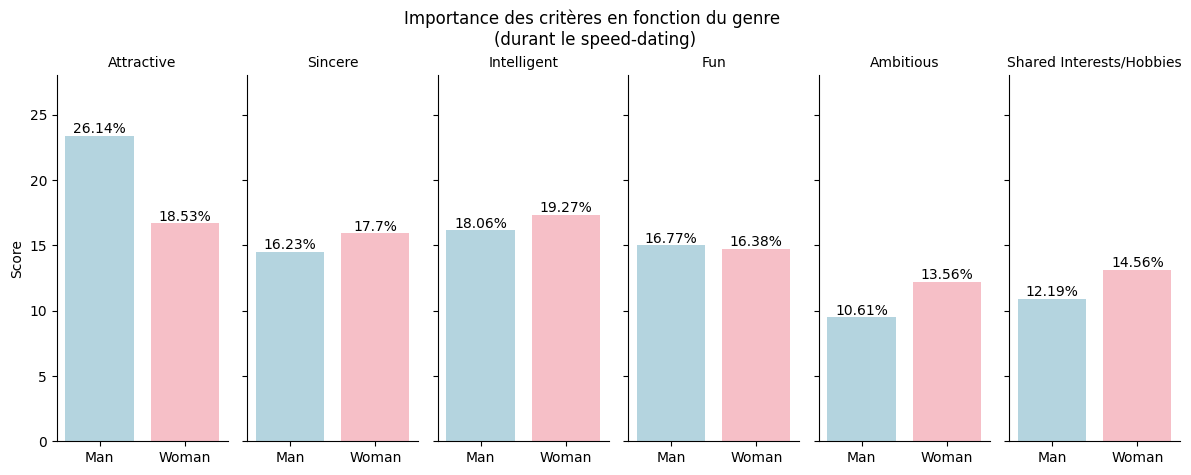

In [67]:
# A mi parcours dans le speed-dating
plot_attribute_expectations_per_genre(participant_df, ["attr1_s", "sinc1_s", "intel1_s", "fun1_s", "amb1_s", "shar1_s"], "Importance des critères en fonction du genre \n(durant le speed-dating)", palette_gender_label)


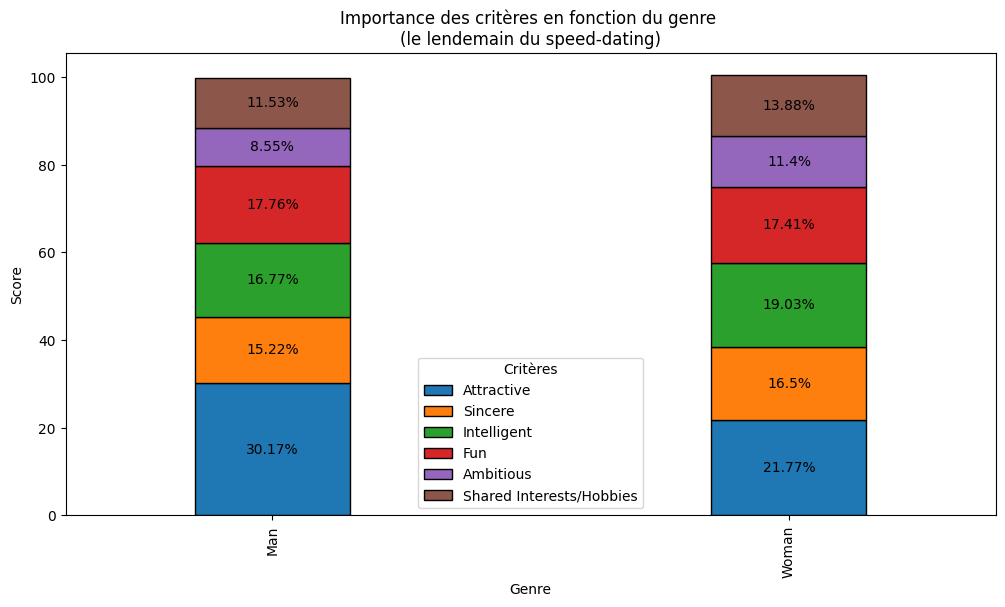

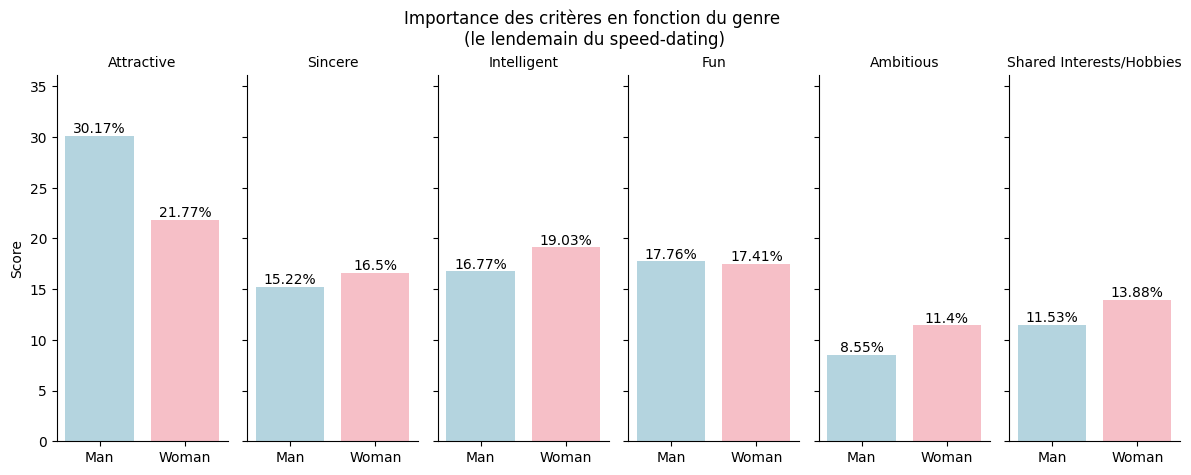

In [68]:
# Le lendemain du speed-dating
plot_attribute_expectations_per_genre(participant_df, ["attr1_2", "sinc1_2", "intel1_2", "fun1_2", "amb1_2", "shar1_2"], "Importance des critères en fonction du genre \n(le lendemain du speed-dating)", palette_gender_label)


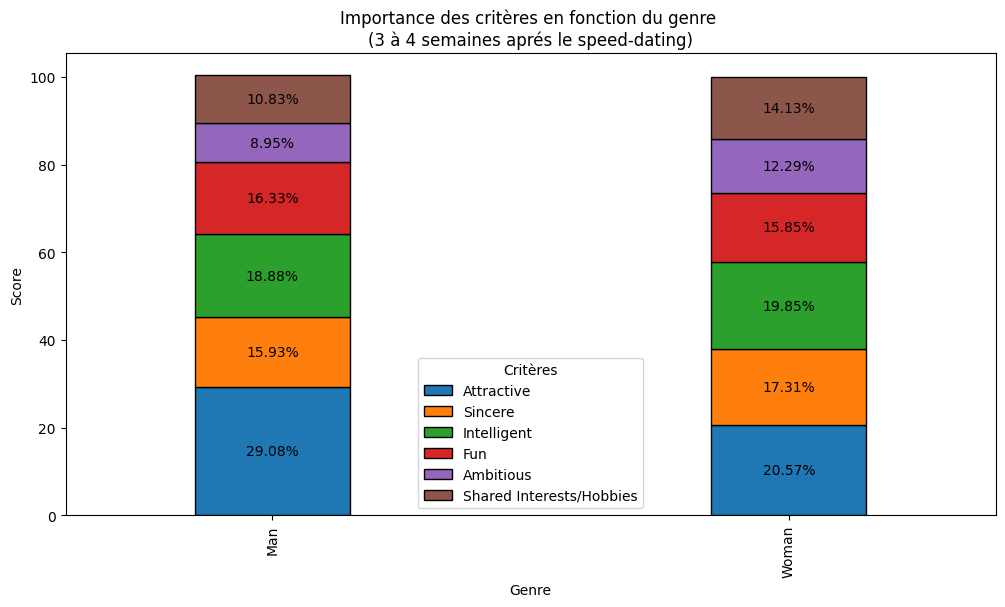

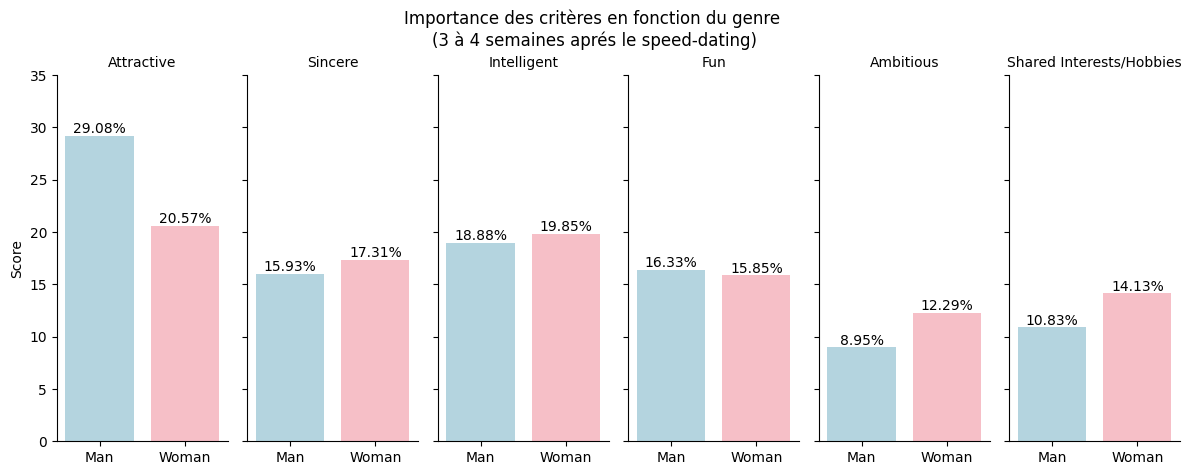

In [69]:
# 3 à 4 semaines aprés le speed-dating
plot_attribute_expectations_per_genre(participant_df, ["attr1_3", "sinc1_3", "intel1_3", "fun1_3", "amb1_3", "shar1_3"], "Importance des critères en fonction du genre \n(3 à 4 semaines aprés le speed-dating)", palette_gender_label)


##### Importance réelle

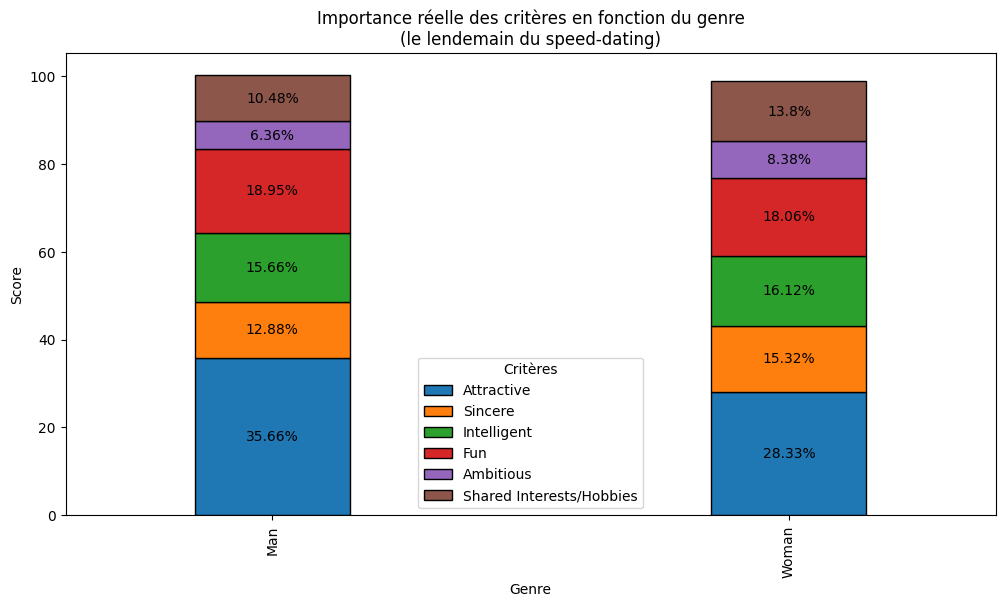

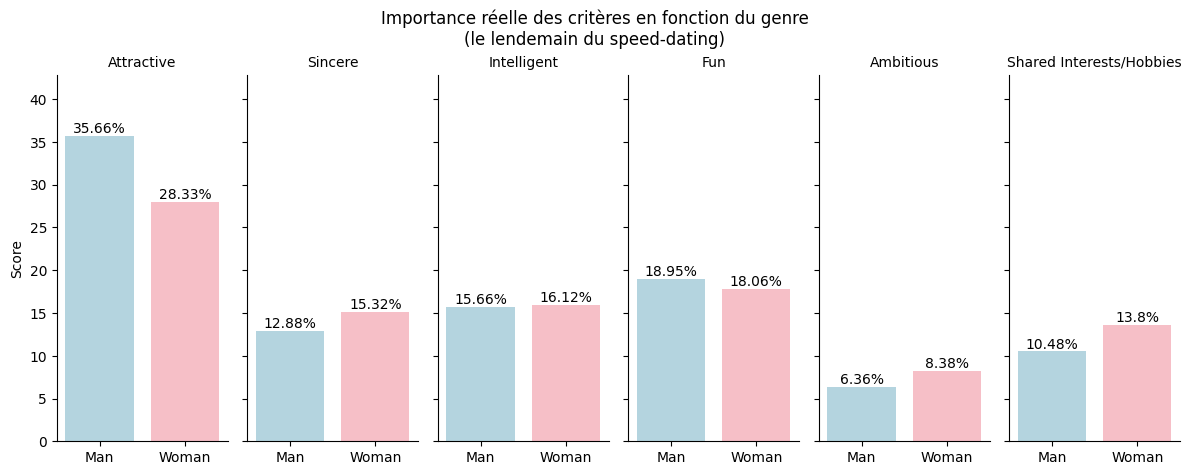

In [70]:
# Le lendemain du speed-dating
plot_attribute_expectations_per_genre(participant_df, ["attr7_2", "sinc7_2", "intel7_2", "fun7_2", "amb7_2", "shar7_2"], "Importance réelle des critères en fonction du genre\n(le lendemain du speed-dating)", palette_gender_label)


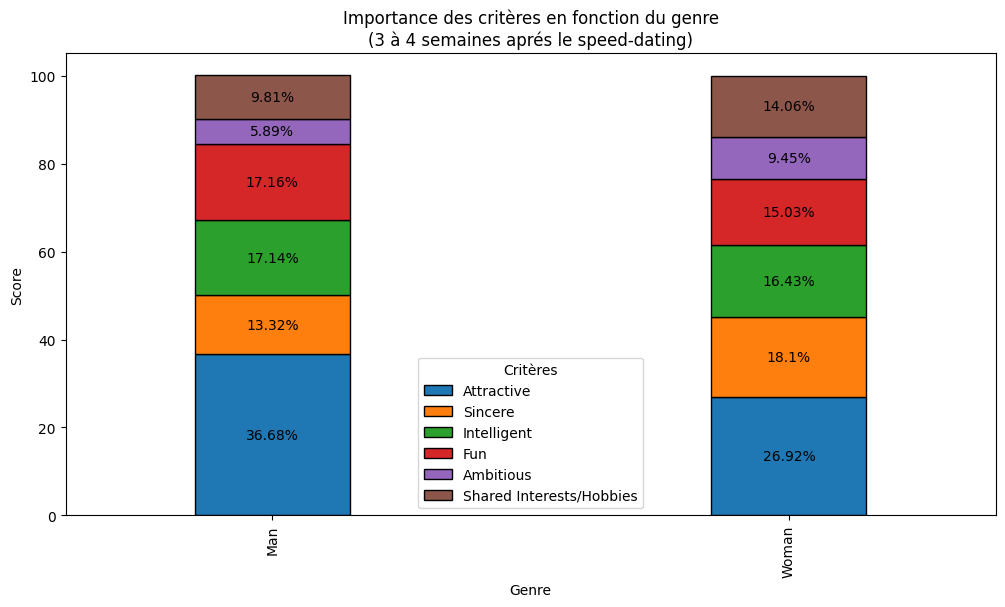

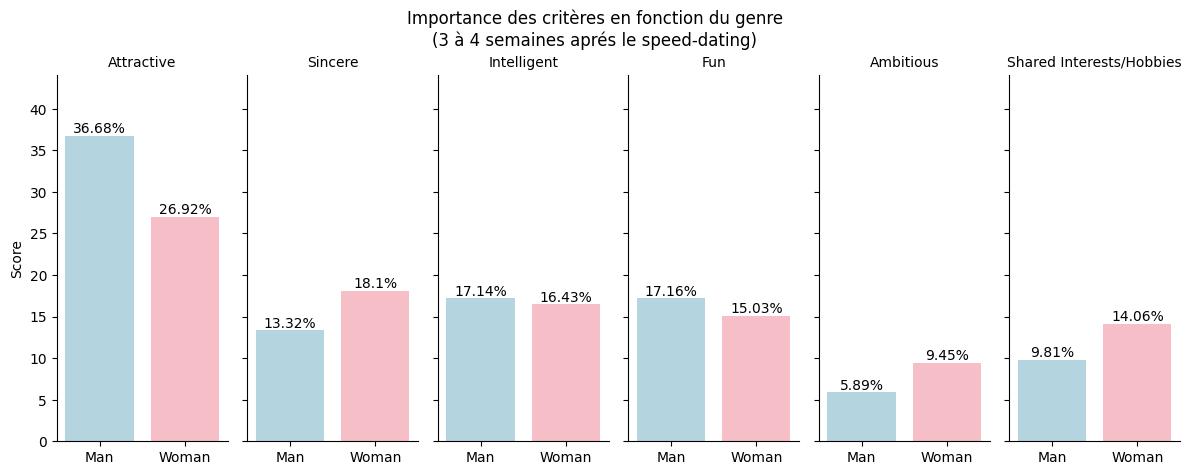

In [71]:
# 3 à 4 semaines aprés le speed-dating
plot_attribute_expectations_per_genre(participant_df, ["attr7_3", "sinc7_3", "intel7_3", "fun7_3", "amb7_3", "shar7_3"], "Importance des critères en fonction du genre\n(3 à 4 semaines aprés le speed-dating)", palette_gender_label)


In [72]:
# Compute attributes expected vs real among times so we can observe changes over time

# Importance des critères en fonction du genre
expected_time_1 = ["attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1"]
expected_time_2 = ["attr1_2", "sinc1_2", "intel1_2", "fun1_2", "amb1_2", "shar1_2"]
expected_time_3 = ["attr1_3", "sinc1_3", "intel1_3", "fun1_3", "amb1_3", "shar1_3"]

# Importance réelle
reel_time_2 = ["attr7_2", "sinc7_2", "intel7_2", "fun7_2", "amb7_2", "shar7_2"]
reel_time_3 = ["attr7_3", "sinc7_3", "intel7_3", "fun7_3", "amb7_3", "shar7_3"]

df = participant_df[["iid", "gender_label"] + expected_time_1 + expected_time_2 + expected_time_3 + reel_time_2 + reel_time_3]
df = df.rename(columns={
    "attr1_1": "T1_expected_attr",
    "sinc1_1": "T1_expected_sinc",
    "intel1_1": "T1_expected_intel",
    "fun1_1": "T1_expected_fun",
    "amb1_1": "T1_expected_amb",
    "shar1_1": "T1_expected_shar",
    
    "attr1_2": "T2_expected_attr",
    "sinc1_2": "T2_expected_sinc",
    "intel1_2": "T2_expected_intel",
    "fun1_2": "T2_expected_fun",
    "amb1_2": "T2_expected_amb",
    "shar1_2": "T2_expected_shar",
    
    "attr1_3": "T3_expected_attr",
    "sinc1_3": "T3_expected_sinc",
    "intel1_3": "T3_expected_intel",
    "fun1_3": "T3_expected_fun",
    "amb1_3": "T3_expected_amb",
    "shar1_3": "T3_expected_shar",
    
    # Reel
    "attr7_2": "T2_reel_attr",
    "sinc7_2": "T2_reel_sinc",
    "intel7_2": "T2_reel_intel",
    "fun7_2": "T2_reel_fun",
    "amb7_2": "T2_reel_amb",
    "shar7_2": "T2_reel_shar",
    "attr7_3": "T3_reel_attr",
    "sinc7_3": "T3_reel_sinc",
    "intel7_3": "T3_reel_intel",
    "fun7_3": "T3_reel_fun",
    "amb7_3": "T3_reel_amb",
    "shar7_3": "T3_reel_shar",
})

# Melt to long format
df_long = df.melt(id_vars=["iid", "gender_label"], var_name='col', value_name='value')

# Extract T and attribute name
df_long[['T', 'attribute']] = df_long['col'].str.extract(r'^(T\d+_[a-z]+)_(.+)$')

# Pivot to get T2 and T3 as columns, variable as row
df_pivot = df_long.pivot(index=["iid", "gender_label", 'attribute'], columns='T', values='value').reset_index()

# Optional: sort columns
df_pivot = df_pivot[["iid", "gender_label", 'attribute'] + sorted([col for col in df_pivot.columns if col.startswith('T')])]

desired_attributes_df = df_pivot[["gender_label", "attribute", "T1_expected", "T2_expected", "T3_expected", "T2_reel", "T3_reel"]].groupby(["gender_label", "attribute"]).mean()
display(desired_attributes_df)


T                       T1_expected  T2_expected  T3_expected    T2_reel    T3_reel
gender_label attribute                                                             
Man          amb           8.823906     8.535344     8.975983   6.370968   5.896552
             attr         27.248751    30.126693    29.182308  35.714286  36.741379
             fun          17.600789    17.736318    16.386923  18.984127  17.189655
             intel        19.387366    16.751420    18.947265  15.682540  17.172414
             shar         10.982218    11.511996    10.870000  10.500000   9.827586
             sinc         16.379562    15.204505    15.980171  12.903226  13.344828
Woman        amb          12.818410    11.446744    12.294178   8.274194   9.465753
             attr         18.020307    21.862901    20.565685  27.984127  26.958904
             fun          17.299048    17.489760    15.851301  17.841270  15.054795
             intel        20.970942    19.117995    19.846712  15.920635  16.452055
             shar         12.697782    13.942427    14.129589  13.634921  14.082192
             sinc         18.222164    16.576530    17.313767  15.129032  18.123288

In [73]:
import plotly.graph_objects as go

def plot_polar(figure, data, colors):
    # Extract list of columns and rename labels
    cols = list(data.columns)
    labels = [LabelDecoder.get_attribute_label(c) for c in cols]

    # Women Polar Chart
    figure.add_trace(go.Scatterpolar(
        r=data.loc['Woman'].values.tolist(),
        theta=labels,
        fill='toself',
        line_color=colors["woman"],
        name='Woman'
    ))
    # Men Polar Chart
    figure.add_trace(go.Scatterpolar(
        r=data.loc['Man'].values.tolist(),
        theta=labels,
        fill='toself',
        line_color=colors["man"],
        name='Man'
    ))

def show_fig(figure, title):
    # Set Title and Value Range of Polar Chart
    figure.update_layout(
        title=title,
        title_x=0.5,
        width=700,
        height=500,
        polar=dict(
            radialaxis=dict(
                visible=False
            )),
        showlegend=True
    )
    
    figure.show()

# Compute means for expected and real impact of attributes
desired_attributes_evol_df = desired_attributes_df.copy()

desired_attributes_evol_df["Expected"] = (desired_attributes_evol_df["T1_expected"] + desired_attributes_evol_df["T2_expected"] + desired_attributes_evol_df["T3_expected"]) / 3
desired_attributes_evol_df["Real"] = (desired_attributes_evol_df["T2_reel"] + desired_attributes_evol_df["T3_reel"]) / 2

desired_attributes_evol_df = desired_attributes_evol_df[["Expected", "Real"]]

# Create a Polar Chart
fig = go.Figure()

i_df = desired_attributes_evol_df["Expected"].unstack()
plot_polar(fig, i_df, COLORS)
show_fig(fig, "Importance imaginée critères en fonction du genre")

fig = go.Figure()

r_df = desired_attributes_evol_df["Real"].unstack()
plot_polar(fig, r_df, COLORS)

show_fig(fig, "Importance réelle des critères en fonction du genre")

Lors de l'inscription:
- Les hommes recherchent de l'attractivité et de l'intelligence chez une femme.
- Les femmes recherchent de l'intelligence et de la sincérité (l'attractivité venant juste aprés) chez un homme.

Au final:
- Les hommes se laissent convaincre d'abord par l'attractivité puis l'intelligence et le fun chez une femme.
- Les femmes se laissent convaincre d'abord par l'attractivité puis l'intelligence et le fun chez un homme.

On voit que les hommes et les femmes semblent se rassembler sur ce qui motive réellement leurs choix.
Il est amusant de noter la différence importante entre l'importance présumée de l'attractivité d'un homme et l'importance réelle que celle-ci joue dans la prise de décision (presque 10 point/50% de plus que leur supposition). Les hommes sous estime aussi cet attribut (33% de plus en réalité), mais ils l'avaient toutefois dèjà placé en large tête.

##### Connaissance des autres: Quelles sont d'aprés les participants les attentes de leurs congénéres de même sexe

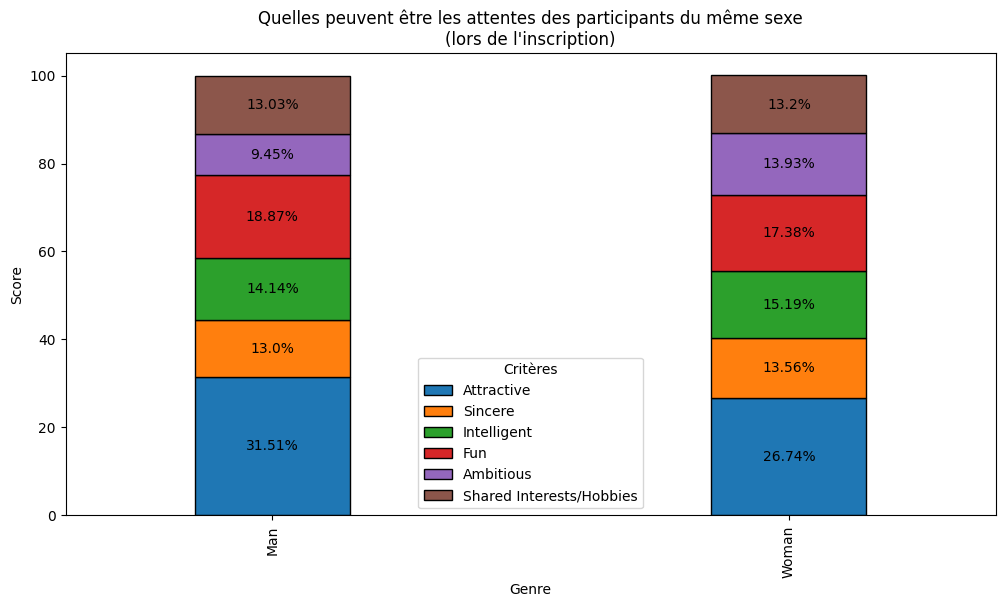

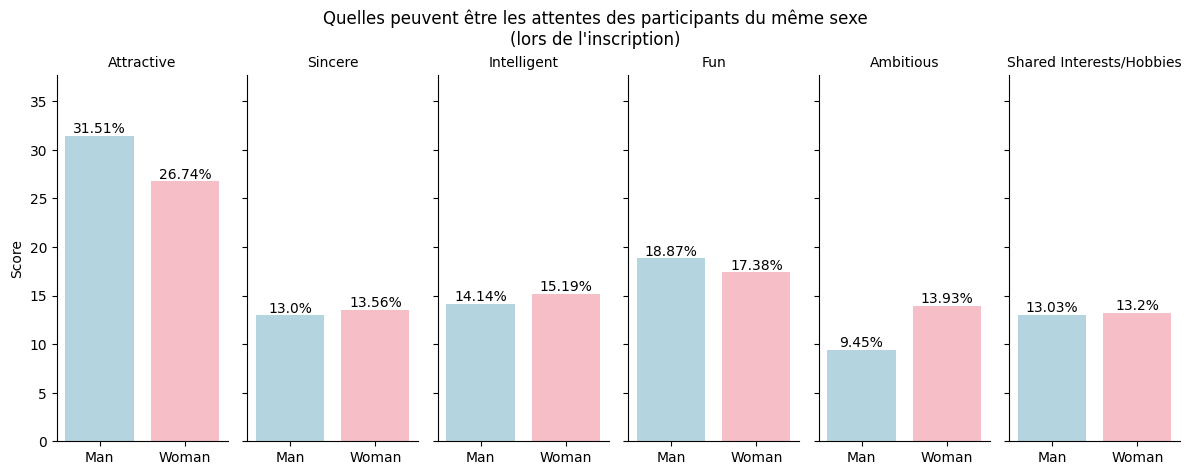

In [74]:
plot_attribute_expectations_per_genre(participant_df, ["attr4_1", "sinc4_1", "intel4_1", "fun4_1", "amb4_1", "shar4_1"], "Quelles peuvent être les attentes des participants du même sexe\n(lors de l'inscription)", palette_gender_label)


Tout le monde est convaincu que leur congénéres n'ont d'yeux que pour l'attractivité d'un partenaire.
Ce qui est intéressant c'est que les femmes sont bien moins enclain à penser celà d'elle même (18% du poids des votes).

##### Connaissance des autres: Quelles sont d'aprés les participants les attentes de leurs congénéres du sexe opposé

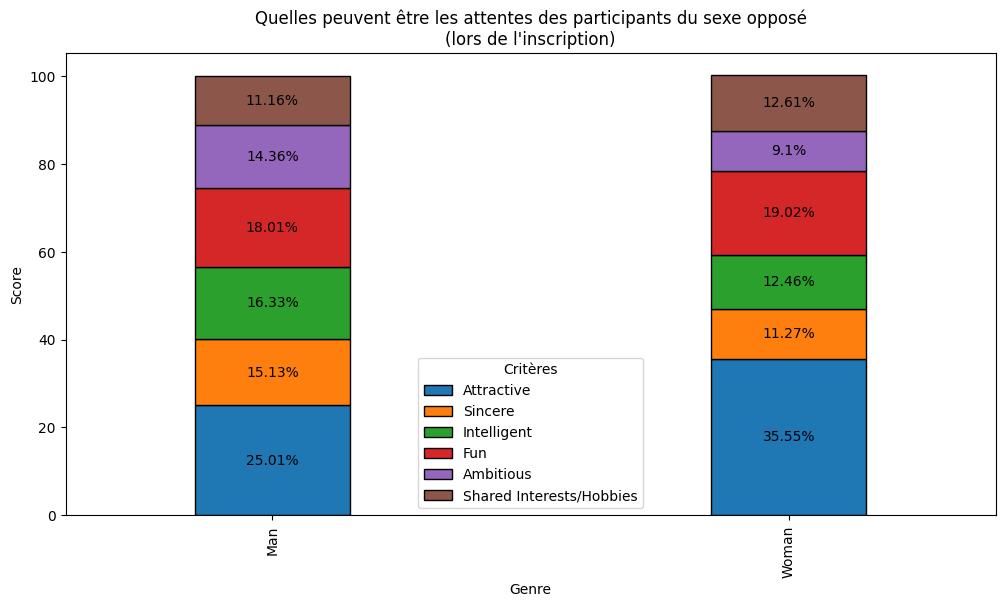

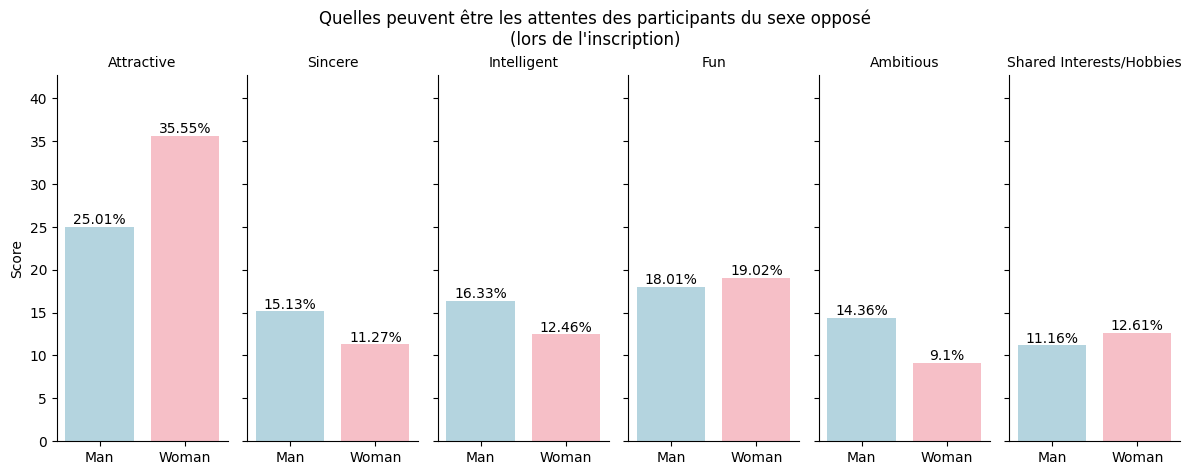

In [75]:
plot_attribute_expectations_per_genre(participant_df, ["attr2_1", "sinc2_1", "intel2_1", "fun2_1", "amb2_1", "shar2_1"], "Quelles peuvent être les attentes des participants du sexe opposé\n(lors de l'inscription)", palette_gender_label)


Les femmes voient clair dans le jeu des hommes! Ils s'intéressent surtout à l'attractivité.
L'ambition et les intérêts commun sont un peu surcotés par le sexe opposé!


##### Connaissance de soi et évolution

In [76]:
participant_how_i_value_me_inscription = ["attr3_1", "sinc3_1", "intel3_1", "fun3_1", "amb3_1"]
participant_how_i_value_me_day_after = ["attr3_2", "sinc3_2", "intel3_2", "fun3_2", "amb3_2"]

how_partner_valued_me = ["attr_o", "sinc_o", "intel_o", "fun_o", "amb_o"]

attribute_phase_map = {
    "attr3_1": "Inscription",
    "sinc3_1": "Inscription",
    "intel3_1": "Inscription",
    "fun3_1": "Inscription",
    "amb3_1": "Inscription",
    
    "attr3_2": "Lendemain",
    "sinc3_2": "Lendemain",
    "intel3_2": "Lendemain",
    "fun3_2": "Lendemain",
    "amb3_2": "Lendemain",
    
    "attr_o": "Partenaire",
    "sinc_o": "Partenaire",
    "intel_o": "Partenaire",
    "fun_o": "Partenaire",
    "amb_o": "Partenaire"
}

participant_evaluation_df = participant_df[["gender_label"] + participant_how_i_value_me_inscription + participant_how_i_value_me_day_after + how_partner_valued_me]

participant_evaluation_df = pd.melt(
    participant_evaluation_df,
    id_vars=["gender_label"],
    var_name='attribute', 
    value_name='rating'
)

participant_evaluation_df['source'] = participant_evaluation_df['attribute'].map(attribute_phase_map)
participant_evaluation_df['attribute_name'] = participant_evaluation_df['attribute'].map(LabelDecoder.get_attribute_label)

display(participant_evaluation_df)

,gender_label,attribute,rating,source,attribute_name
0,Woman,attr3_1,6.000000,Inscription,Attractive
1,Woman,attr3_1,7.000000,Inscription,Attractive
2,Woman,attr3_1,8.000000,Inscription,Attractive
3,Woman,attr3_1,7.000000,Inscription,Attractive
4,Woman,attr3_1,6.000000,Inscription,Attractive
...,...,...,...,...,...
8260,Man,amb_o,6.150000,Partenaire,Ambitious
8261,Man,amb_o,6.000000,Partenaire,Ambitious
8262,Man,amb_o,6.363636,Partenaire,Ambitious
8263,Man,amb_o,6.238095,Partenaire,Ambitious


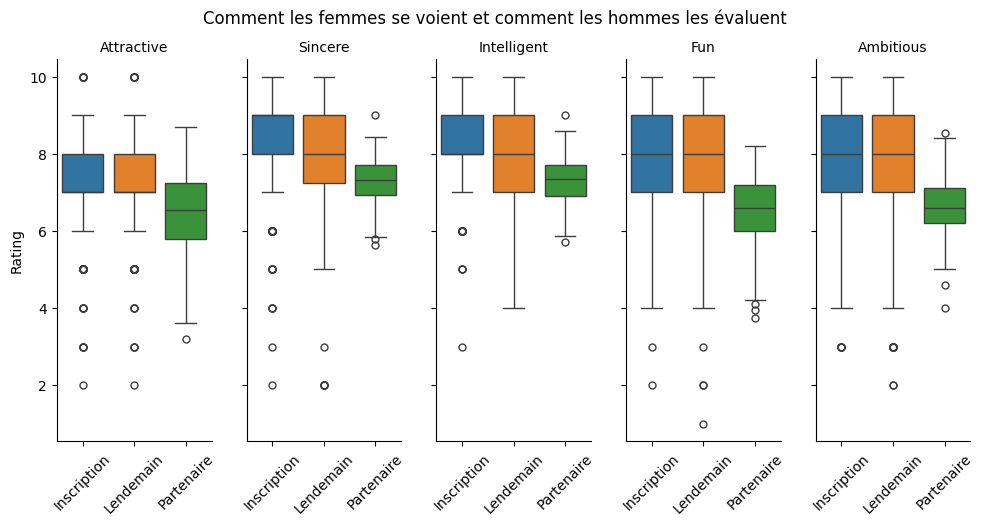

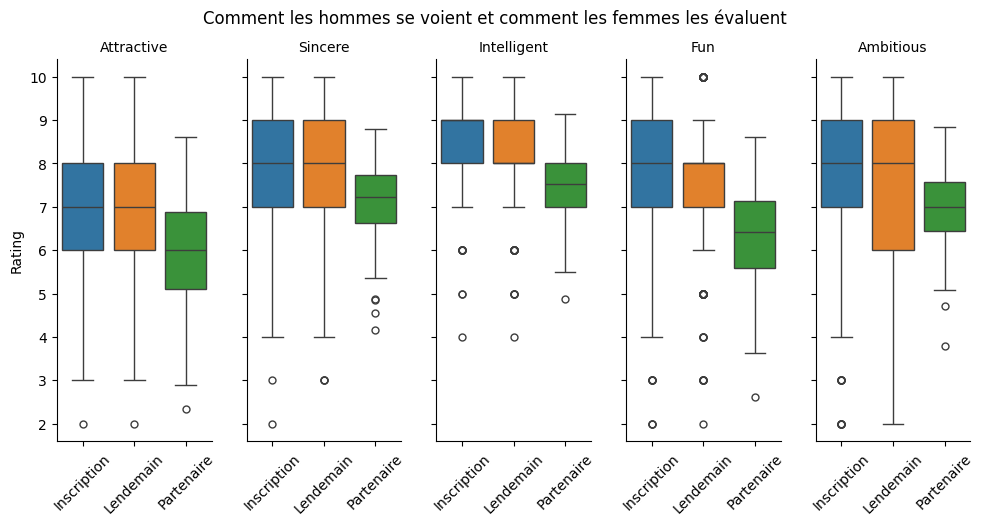

In [77]:
# Femmes
g = sns.catplot(data=participant_evaluation_df[participant_evaluation_df["gender_label"] == "Woman"],
        x="source", y="rating",
        col="attribute_name",
        kind="box", hue="source", height=5, aspect=.4)

g.fig.subplots_adjust(top=0.88)
g.fig.suptitle("Comment les femmes se voient et comment les hommes les évaluent")

g.set_axis_labels("", "Rating")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45)

# Homme
g = sns.catplot(data=participant_evaluation_df[participant_evaluation_df["gender_label"] == "Man"],
        x="source", y="rating",
        col="attribute_name",
        kind="box", hue="source", height=5, aspect=.4)

g.fig.subplots_adjust(top=0.88)
g.fig.suptitle("Comment les hommes se voient et comment les femmes les évaluent")

g.set_axis_labels("", "Rating")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45)



En règle générale, tout le monde se surévalue lègèrement.

#### <span style="color:green"><b>Remarques</b></span> 

- Les participants ont majoritairement entre 20 et 30 ans
- Les deux genres sont équitablements répartis et représentés (nombre: heureusement pour du dating, races, ages)
- Les motifs de participations, quelque soit le sexe, sont principalements **pour le fun** et **pour faire de nouvelles rencontres**
- concernant la sensibilité quant aux réligions et races:
  - les hommes sont plus ouverts sur ces aspects
  - une plus grande proportion de femmes est attachés au partage d'une même réligion ou même race
  - 50% des femmes et 66% des hommes on exprimé un faible niveau d'attachement à une religion commune (score <=3)
- Les hommes semblent accorder plus d'intérêt pour l'attractivité d'une femme que pour son intelligence
- Les femmes sont moins intéressées par l'ambition ou les centre d'intérêt en commun, en préférant légèrement un partenaire intelligent
- Les deux sexes accordent une importance similaire au coté "fun" du partenaire